In [1]:
# Importing the required Libraries.
import pandas as pd
import numpy as np
import sys
import os
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
sns.set_style('white')

from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
print(df.columns)
print('*'*50)
for i in df.columns :
    print(i)
    print(df[i].describe())
    print('*'*50)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
**************************************************
Age
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64
**************************************************
Gender
count      583
unique       2
top       Male
freq       441
Name: Gender, dtype: object
**************************************************
Total_Bilirubin
count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64
**************************************************
Direct_Bilirubin
count    583.000000
m

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df = pd.read_csv('indian_liver_patient.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


# Data Cleaning

In [8]:
# Re-naming the columns
df =  df.rename(columns={'Dataset':'Liver_disease','Alamine_Aminotransferase':'Alanine_Aminotransferase'}, inplace=False)

In [9]:
# Renaming Done
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
# Dropping Null Values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
df = df.dropna()
# Changing the values in "Liver_Disease" column
df['Liver_disease'] = df['Liver_disease'] - 1
# Converting Gender column into categorical data
LabelEncoder = LabelEncoder()
df['Is_male'] = LabelEncoder.fit_transform(df['Gender'])
df = df.drop(columns='Gender')

In [11]:
X = df[['Age', 'Total_Bilirubin',
        'Direct_Bilirubin',
        'Alkaline_Phosphotase',
        'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Is_male']]
y = df['Liver_disease']

In [12]:
df.skew(axis = 0, skipna = True)

Age                           -0.033591
Total_Bilirubin                4.890768
Direct_Bilirubin               3.199163
Alkaline_Phosphotase           3.753502
Alanine_Aminotransferase       6.527575
Aspartate_Aminotransferase    10.512251
Total_Protiens                -0.292433
Albumin                       -0.048516
Albumin_and_Globulin_Ratio     0.992299
Liver_disease                  0.955179
Is_male                       -1.209212
dtype: float64

Text(0, 0.5, 'Alanine Aminotransferase (units/L)')

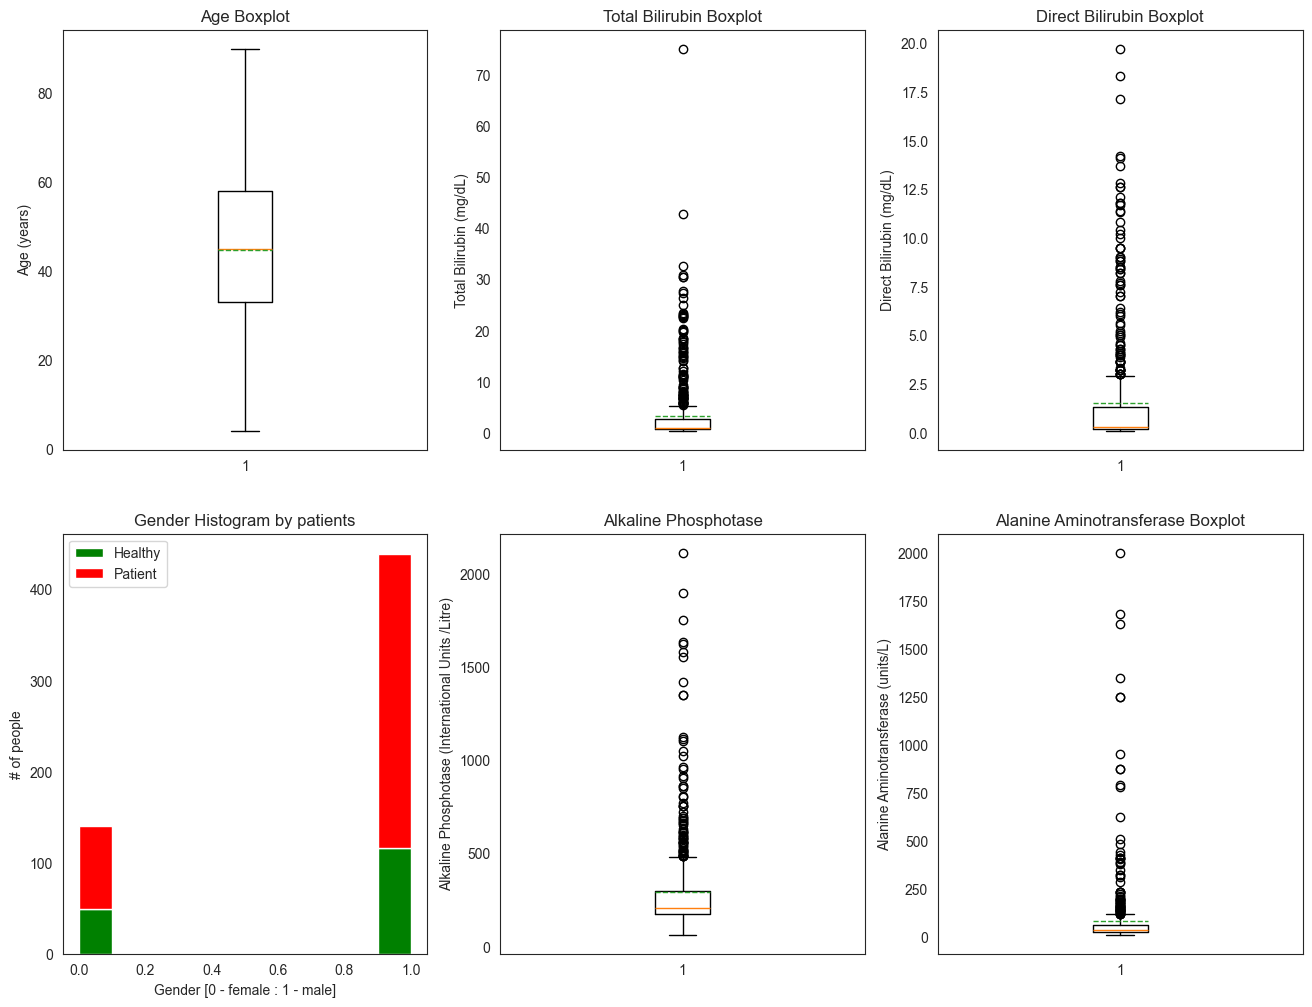

In [13]:
# Plotting the box plots
import matplotlib.pyplot as plt
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x = X['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')

plt.subplot(232)
plt.boxplot(X['Total_Bilirubin'], showmeans = True, meanline = True)
plt.title('Total Bilirubin Boxplot')
plt.ylabel('Total Bilirubin (mg/dL)')

plt.subplot(233)
plt.boxplot(X['Direct_Bilirubin'], showmeans = True, meanline = True)
plt.title('Direct Bilirubin Boxplot')
plt.ylabel('Direct Bilirubin (mg/dL)')

plt.subplot(234)
plt.hist(x = [X[y==1]['Is_male'], X[y ==0]['Is_male']],
         stacked=True, color = ['g','r'],label = ['Healthy','Patient'])
plt.title('Gender Histogram by patients')
plt.xlabel('Gender [0 - female : 1 - male]')
plt.ylabel('# of people')
plt.legend()

plt.subplot(235)
plt.boxplot(x = X['Alkaline_Phosphotase'], showmeans = True, meanline = True)
plt.title('Alkaline Phosphotase')
plt.ylabel('Alkaline Phosphotase (International Units /Litre)')

plt.subplot(236)
plt.boxplot(X['Alanine_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase Boxplot')
plt.ylabel('Alanine Aminotransferase (units/L)')

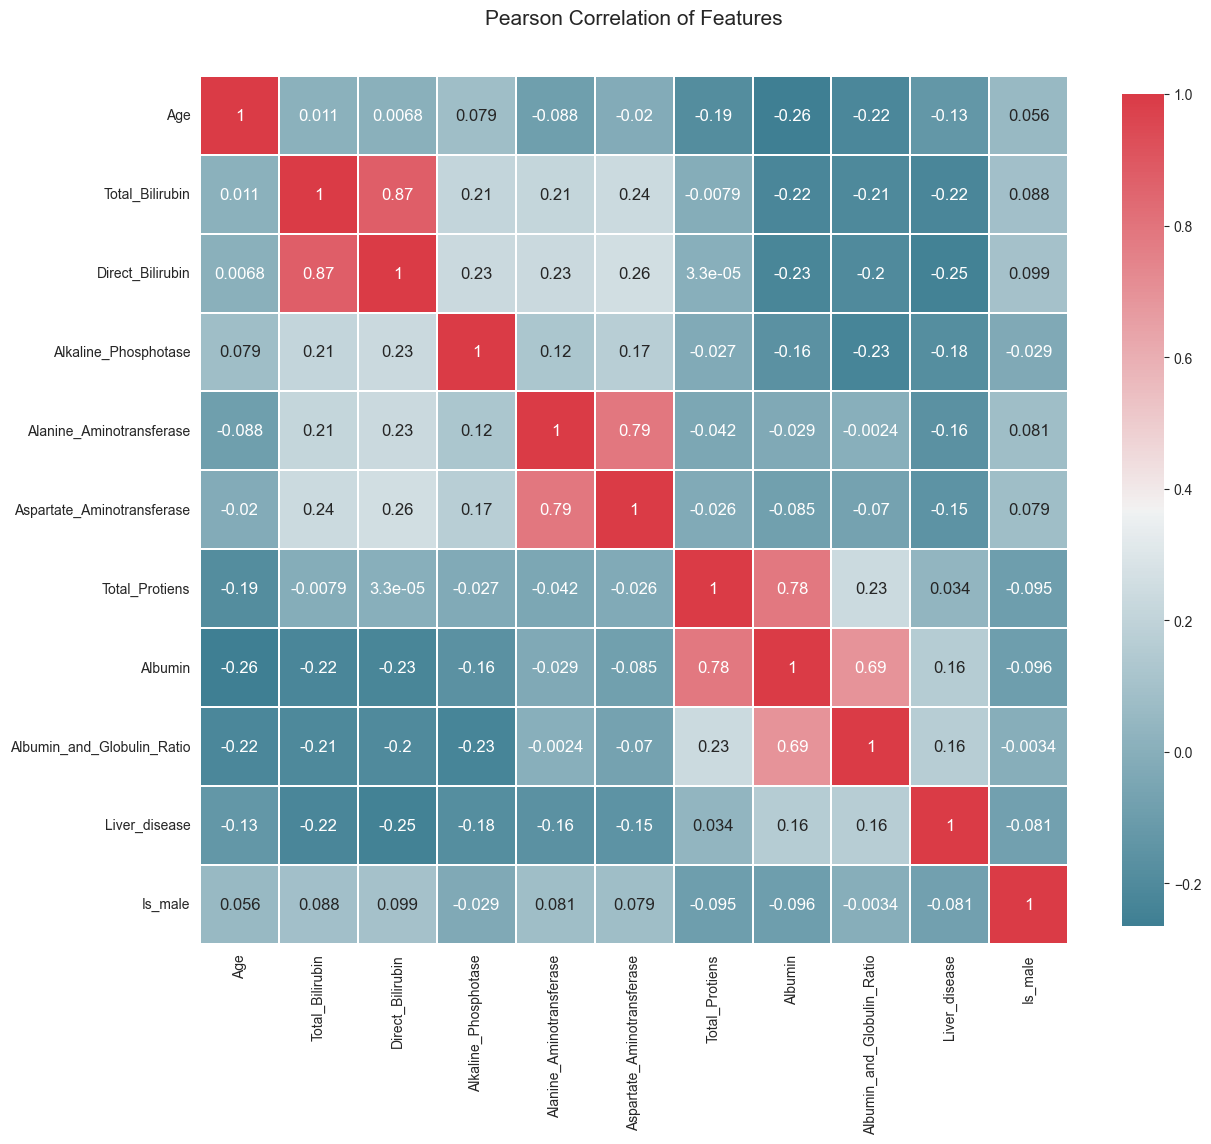

In [14]:
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

# Modelling

In [15]:
from sklearn import preprocessing
X_scaler = preprocessing.normalize(X)

In [16]:
# Splitting the data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaler, y, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (434, 10)
Test Shape: (145, 10)


Logistic Regression Model

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [18]:
# Use score method to get accuracy of model
from sklearn import metrics
score = lr.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred))

Score of the model is -  0.7172413793103448
Report card of this model - 
              precision    recall  f1-score   support

           0      0.717     1.000     0.835       104
           1      0.000     0.000     0.000        41

    accuracy                          0.717       145
   macro avg      0.359     0.500     0.418       145
weighted avg      0.514     0.717     0.599       145

Accuracy score -  0.7172413793103448


In [19]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.500


Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7172413793103448')

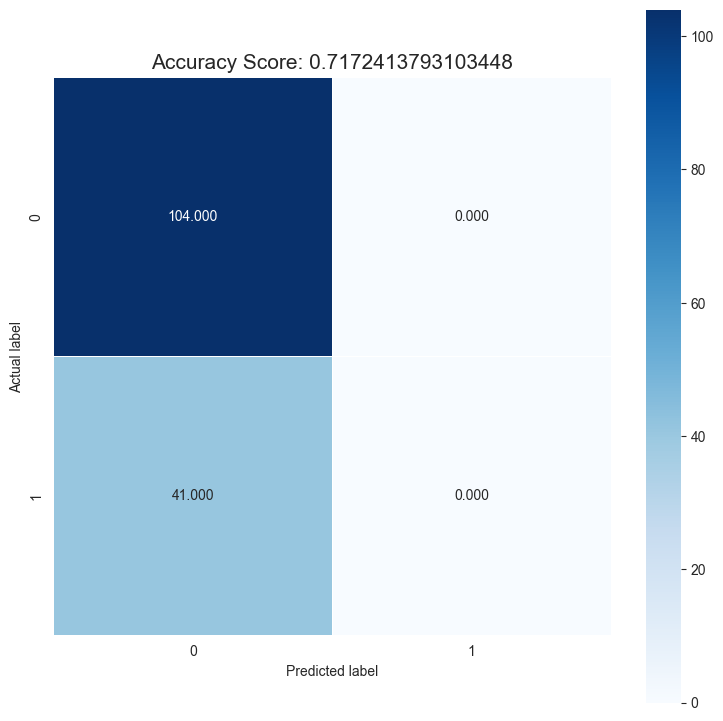

In [20]:
cm1 = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

KNN Model

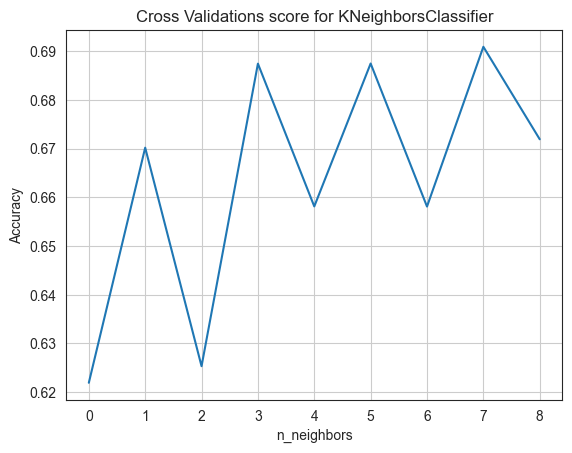

In [21]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
hist = []
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X_scaler, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [23]:
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.6620689655172414
Report card of this model - 
              precision    recall  f1-score   support

           0      0.731     0.837     0.780       104
           1      0.346     0.220     0.269        41

    accuracy                          0.662       145
   macro avg      0.539     0.528     0.524       145
weighted avg      0.622     0.662     0.636       145

Accuracy score -  0.6620689655172414


In [24]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_knn)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.528


Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.6620689655172414')

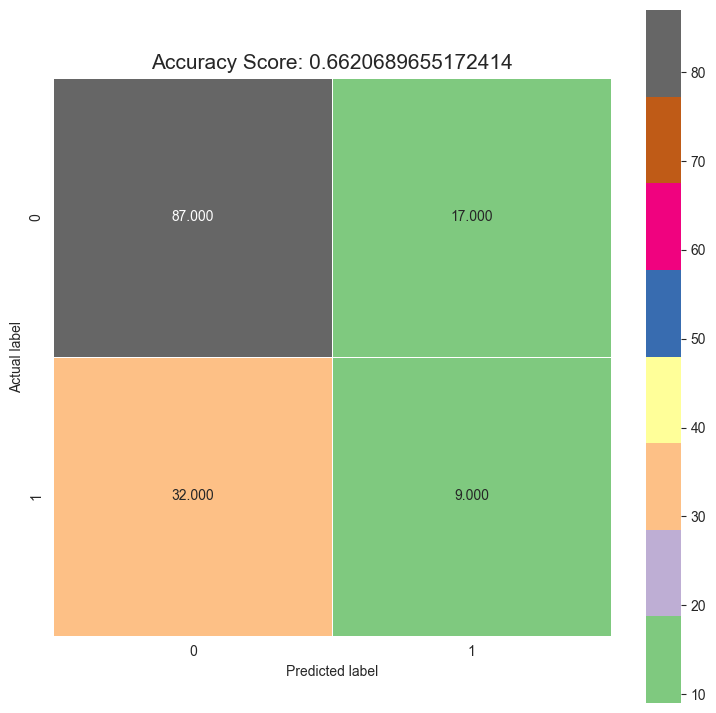

In [25]:
cm4 = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Accent');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [26]:
import pandas as pd
df = pd.read_csv('indian_liver_patient.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [27]:
from sklearn import preprocessing
X_scaler = preprocessing.normalize(X)

In [28]:
# Splitting the data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaler, y, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (434, 10)
Test Shape: (145, 10)


Support Vector Machine Model

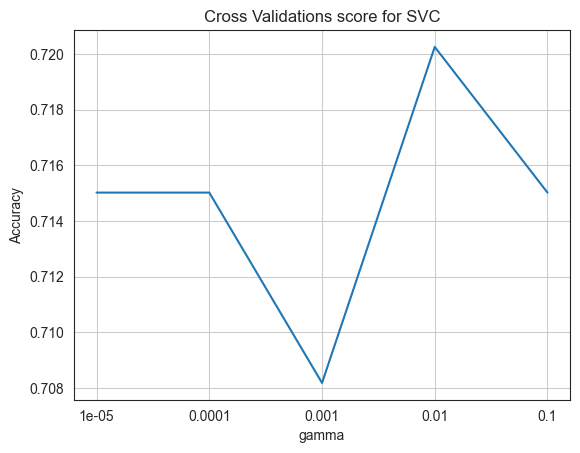

In [29]:
# Support Vector machine Model
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
grid = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [30]:
svm = SVC(kernel= "linear",C=0.025, random_state = 0 , gamma=0.01)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [31]:
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

Score of the model is -  0.7172413793103448
Report card of this model - 
              precision    recall  f1-score   support

           0      0.717     1.000     0.835       104
           1      0.000     0.000     0.000        41

    accuracy                          0.717       145
   macro avg      0.359     0.500     0.418       145
weighted avg      0.514     0.717     0.599       145

Accuracy score -  0.7172413793103448


In [32]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_svm)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.500


Random Forest Model

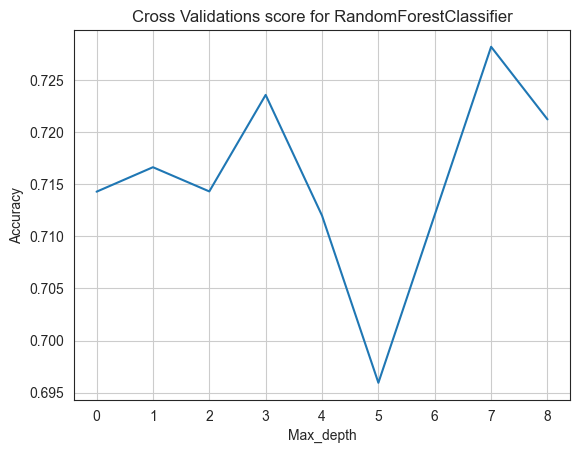

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

hist1 = []
for i in range(1,10):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [34]:
ran_for = RandomForestClassifier(n_estimators=80, max_depth=8, random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)

In [35]:
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.696551724137931
Report card of this model - 
              precision    recall  f1-score   support

           0      0.759     0.846     0.800       104
           1      0.448     0.317     0.371        41

    accuracy                          0.697       145
   macro avg      0.603     0.582     0.586       145
weighted avg      0.671     0.697     0.679       145

Accuracy score -  0.696551724137931


In [36]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_ran)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.582


Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.696551724137931')

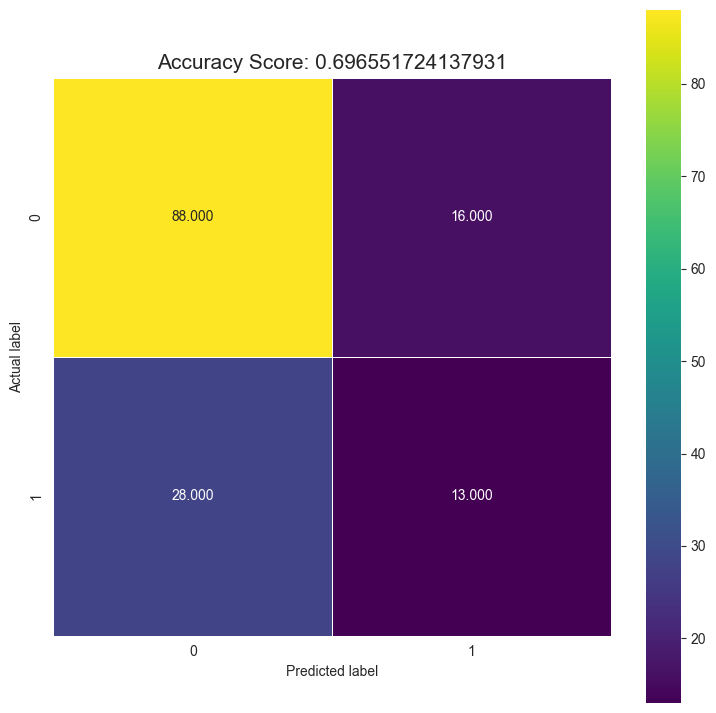

In [37]:
cm6 = metrics.confusion_matrix(y_test, y_pred_ran)
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

Maximum accuracy of **71.7%** can be achieved. This accuracy has been achieved by **Logistic Regression** Model

In [38]:
#print the true and predicted values
dictionary = {'Actual values': y_test, 'Predicted values': y_pred}
pd.DataFrame.from_dict(dictionary)

,Actual values,Predicted values
499,0,0
403,1,0
485,0,0
103,1,0
122,1,0
...,...,...
172,0,0
301,0,0
232,0,0
178,0,0


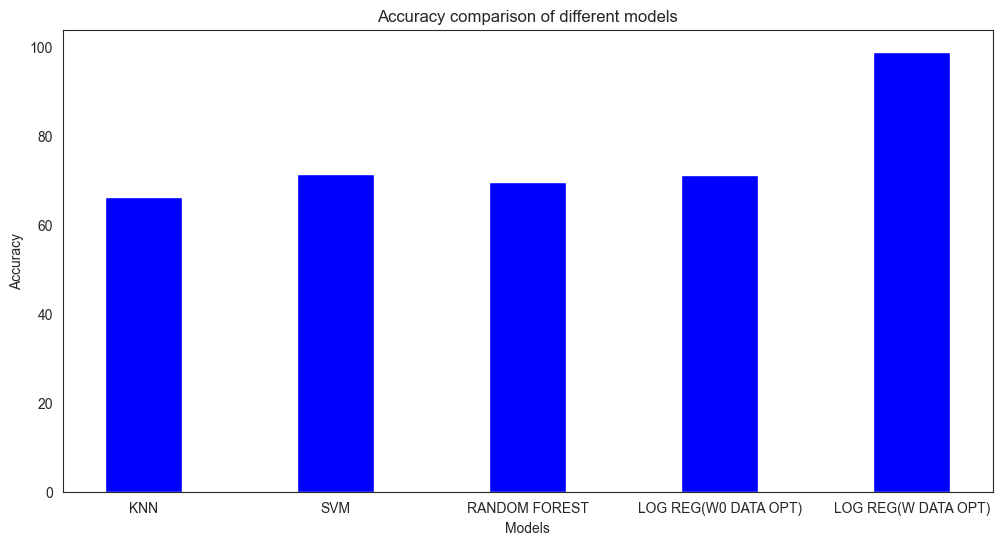

In [40]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'KNN':66.2, 'SVM':71.5, 'RANDOM FOREST':69.6,
        'LOG REG(W0 DATA OPT)':71.3,'LOG REG(W DATA OPT)':98.9}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (12, 6))

# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison of different models")
plt.show()